In [189]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math


def clip(i):
    return np.clip(i, 0, 1)

def show(A): 
    plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB) * 255)
    

Reading images


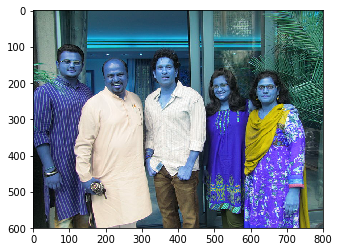

In [190]:
print('Reading images')

post = cv2.imread('poster.jpeg')
fram = cv2.imread('frame.jpeg')
ppl = cv2.imread('people.jpeg')
plt.imshow(ppl)


[[ 17 178  22 ...   0  33  33]
 [118 169 128 ...  78  90 142]
 [ 96  48  57 ...   2  70  34]
 ...
 [183 211 105 ... 187 244 197]
 [181 173 217 ... 248  80  41]
 [134 253 158 ... 117 173 159]]


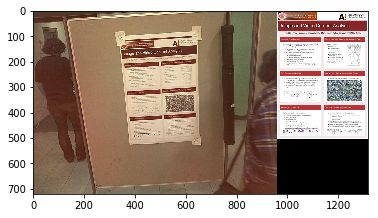

In [253]:
orb = cv2.ORB_create()

k1, d1 = orb.detectAndCompute(post, None)
k2, d2 = orb.detectAndCompute(fram, None)
print (d1)
k1 = np.array(k1)
k2 = np.array(k2)

plt.imshow(d1)
cv2.imwrite('test.jpeg', d1)

a = post.shape[0]
b = fram.shape[0]
height = max(a, b)
width = post.shape[1]+ fram.shape[1]
img = np.zeros((height, width, 3), np.uint8)

dx = post.shape[1]

for i in range(0, fram.shape[0]):
    for j in range(0, fram.shape[1]):
        img[i][j] = fram[i][j]

for i in range(fram.shape[1], fram.shape[1] + post.shape[0]):
    for j in range(0, fram.shape[0]):
        if j < post.shape[0] and i < img.shape[1]:
            img[j][i] = (post[j][i - fram.shape[1]])
cv2.imwrite('combined.jpeg', img)
plt.imshow(img)

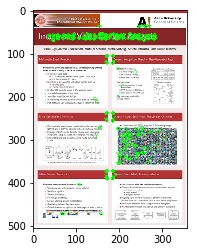

In [192]:
post2 = cv2.imread('poster.jpeg')
fram2 = cv2.imread('frame.jpeg')
gray=cv2.cvtColor(post2, cv2.COLOR_BGR2GRAY)

out1 = cv2.drawKeypoints(post, k1, None, color=(0,255,0))
out2 = cv2.drawKeypoints(fram, k2, None, color=(0,255,0))

cv2.imwrite('test1.jpeg', out1)
cv2.imwrite('test2.jpeg', out2)
plt.imshow(out1)

In [193]:
kn1 = cv2.ml.KNearest_create()
kn2 = cv2.ml.KNearest_create()

kn1.train(np.float32(d1), cv2.ml.ROW_SAMPLE, np.arange(len(d1)))
ret1, res1, nei1, dis1 = kn1.findNearest(np.float32(d2), k=1)

kn2.train(np.float32(d2), cv2.ml.ROW_SAMPLE, np.arange(len(d2)))
ret2, res2, nei2, dis2 = kn2.findNearest(np.float32(d1), k=1)



[[431.]
 [227.]
 [ 97.]
 [311.]
 [ 44.]
 [ 55.]
 [ 32.]
 [347.]
 [417.]
 [ 14.]
 [ 37.]
 [ 17.]
 [112.]
 [226.]
 [ 62.]
 [ 35.]
 [ 82.]
 [485.]
 [298.]
 [ 44.]
 [ 37.]
 [377.]
 [248.]
 [180.]
 [ 97.]
 [ 25.]
 [ 17.]
 [  8.]
 [ 22.]
 [102.]
 [ 35.]
 [344.]
 [ 44.]
 [ 34.]
 [ 97.]
 [344.]
 [344.]
 [ 46.]
 [ 68.]
 [344.]
 [ 26.]
 [ 77.]
 [ 35.]
 [ 26.]
 [ 97.]
 [ 81.]
 [407.]
 [ 22.]
 [ 73.]
 [ 35.]
 [346.]
 [  1.]
 [ 72.]
 [444.]
 [ 49.]
 [ 97.]
 [338.]
 [ 97.]
 [ 97.]
 [ 82.]
 [261.]
 [ 97.]
 [115.]
 [ 17.]
 [416.]
 [377.]
 [485.]
 [397.]
 [ 78.]
 [484.]
 [  1.]
 [332.]
 [ 93.]
 [346.]
 [468.]
 [ 56.]
 [214.]
 [333.]
 [ 59.]
 [204.]
 [ 22.]
 [ 55.]
 [ 97.]
 [ 97.]
 [ 42.]
 [ 16.]
 [395.]
 [ 60.]
 [319.]
 [259.]
 [ 17.]
 [493.]
 [115.]
 [ 22.]
 [181.]
 [430.]
 [ 82.]
 [104.]
 [ 78.]
 [ 33.]
 [281.]
 [419.]
 [ 24.]
 [ 99.]
 [416.]
 [ 25.]
 [ 35.]
 [ 49.]
 [ 45.]
 [ 17.]
 [497.]
 [ 14.]
 [ 68.]
 [ 25.]
 [ 44.]
 [ 44.]
 [105.]
 [ 72.]
 [ 33.]
 [175.]
 [142.]
 [175.]
 [ 68.]
 [185.]
 [140.]


True

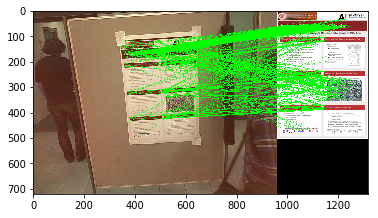

In [207]:
cp = np.array(img, copy=True)
for i in range (len(res2)):
    (a1, b1) = k1[i].pt
    (a2, b2) = k2[int(res2[i])].pt
    cv2.line(cp, (np.int32(a1 + fram.shape[1]), np.int32(b1)), (np.int32(a2), np.int32(b2)), (0, 255, 0), 1)

plt.imshow(cp)
cv2.imwrite('alllinest.jpeg', cp)



True

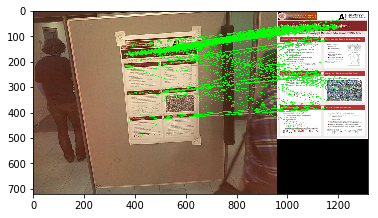

In [216]:
cp = np.array(img, copy=True)
for i in range (len(res1)):
    (a1, b1) = k1[int(res1[i])].pt
    (a2, b2) = k2[i].pt
    for j in range (len(res2)):
        if k1[j].pt ==  k1[int(res1[i])].pt: 
            if k2[int(res2[j])].pt == k2[i].pt:
                cv2.line(cp, (np.int32(a1+ fram.shape[1]), np.int32(b1)), (np.int32(a2), np.int32(b2)), (0, 255, 0), 1)
        
plt.imshow(cp)
cv2.imwrite('linest.jpeg', cp)



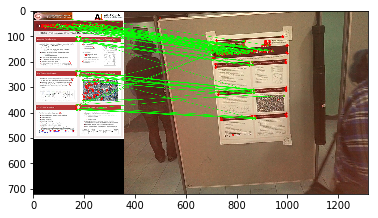

(<matplotlib.image.AxesImage at 0x12d648e10>, None)

In [251]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = 6,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(d1, d2, k=1)


matchesMask = [[0,0] for i in range(len(matches))]

for i in range(0, (len(matches) - 1)):
    m = matches[i][0]
    n = matches[i + 1][0]
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(post, k1, fram, k2,matches,None,**draw_params)

cv2.imwrite('test.jpeg', img3)
plt.imshow(img3,),plt.show()

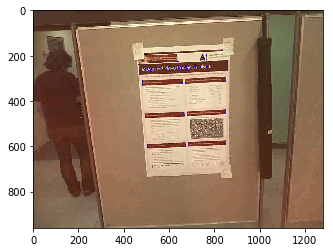

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
cap = cv2.VideoCapture('video.avi')
orb = cv2.ORB_create()
kn1 = cv2.ml.KNearest_create()
post = cv2.imread('poster.jpeg')
k1, d1 = orb.detectAndCompute(post, None)
kn1.train(np.float32(d1), cv2.ml.ROW_SAMPLE, np.arange(len(d1)))
while(True):
    ret, frame = cap.read()
    kk, dd = orb.detectAndCompute(frame, None)
    if dd is None: break
    ret, res, nei, dis = kn1.findNearest(np.float32(dd), k=1)
    cp = np.array(frame, copy=True)
    for i in range(0, post.shape[1]):
        for j in range(0, post.shape[0]):
            if j < post.shape[0] and i < post.shape[1]:
                cp[j][i] = (post[j][i])
    for i in range (len(res)):
        (a1, b1) = k1[int(res[i])].pt
        (a2, b2) = kk[i].pt
        cv2.line(cp, (np.int32(a1), np.int32(b1)), (np.int32(a2), np.int32(b2)), (0, 255, 0), 1)
    cv2.imshow('title', cp)
    cv2.waitKey(0)

cap.release()
cv2.destroyAllWindows()


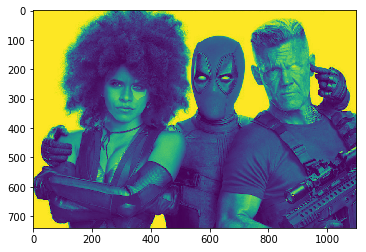

In [298]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
prof_cascade = cv2.CascadeClassifier('./haarcascade_profileface.xml')
face_cascade2 = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
glass_cascade = cv2.CascadeClassifier('./haarcascade_eye_tree_eyeglasses.xml')
body_cascade = cv2.CascadeClassifier('./haarcascade_upperbody.xml')
smile_cascade =  cv2.CascadeClassifier('./haarcascade_smile.xml')

nh = cv2.imread('nohands.jpg')
dp = cv2.imread('dp.jpg')
hb = cv2.imread('hb.jpg')
gray = cv2.cvtColor(dp, cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(nh, cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(dp, cv2.COLOR_BGR2GRAY)
# gray = cv2.cvtColor(hb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

True

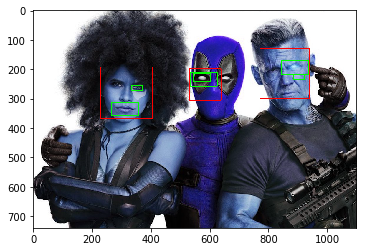

In [314]:
# faces = prof_cascade.detectMultiScale(gray)
faces = face_cascade.detectMultiScale(gray, 1.1, 2)
img = np.array(dp, copy=True)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0) ,2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 2)
    eyes = smile_cascade.detectMultiScale(roi_gray, 1.6, 2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(img)
cv2.imwrite('dpfaceeye.jpeg', img)

In [ ]:
import cv2
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import math

cap = cv2.VideoCapture('video.avi')
orb = cv2.ORB_create()
kn1 = cv2.ml.KNearest_create()
post = cv2.imread('poster.jpeg')
k1, d1 = orb.detectAndCompute(post, None)
kn1.train(np.float32(d1), cv2.ml.ROW_SAMPLE, np.arange(len(d1)))
while(True):
    ret, frame = cap.read()
    cp = np.array(frame, copy=True)
    a = datetime.now()

    kk, dd = orb.detectAndCompute(frame, None)
    if dd is None: break
    ret, res, nei, dis = kn1.findNearest(np.float32(dd), k=1)
    for i in range(0, post.shape[1]):
        for j in range(0, post.shape[0]):
            if j < post.shape[0] and i < post.shape[1]:
                cp[j][i] = (post[j][i])
    for i in range (len(res)):
        (a1, b1) = k1[int(res[i])].pt
        (a2, b2) = kk[i].pt
        cv2.line(cp, (np.int32(a1), np.int32(b1)), (np.int32(a2), np.int32(b2)), (0, 255, 0), 1)



    # index_params = dict(algorithm = 6,
    #                    table_number = 6, # 12
    #                    key_size = 12,     # 20
    #                    multi_probe_level = 1) #2
    # search_params = dict(checks=50)   # or pass empty dictionary
    #
    # flann = cv2.FlannBasedMatcher(index_params, search_params)
    # matches = flann.knnMatch(d1, dd, k=1)
    #
    #
    # matchesMask = [[0,0] for i in range(len(matches))]
    #
    # for i in range(0, (len(matches) - 2)):
    #     m = matches[i]
    #     n = matches[i + 1]
    #     if len(n) > 0 and len(m) > 0:
    #         n = n[0]
    #         m = m[0]
    #         if m.distance < 0.7*n.distance:
    #             matchesMask[i]=[1,0]
    #
    # draw_params = dict(matchColor = (0,255,0),
    #                    singlePointColor = (255,0,0),
    #                    matchesMask = matchesMask,
    #                    flags = 0)
    #
    # img3 = cv2.drawMatchesKnn(post, k1, frame, kk ,matches,None,**draw_params)

    cv2.imshow('title', cp)

    cv2.imwrite('frameslow.jpeg', cp)
    b = datetime.now()
    c = b - a
    print(c.total_seconds())
    cv2.waitKey(0)

cap.release()
cv2.destroyAllWindows()


# import cv2
# import sys
#
# faceCascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
#
# video_capture = cv2.VideoCapture(0)
#
# while True:
#     # Capture frame-by-frame
#     ret, frame = video_capture.read()
#
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#
#     faces = faceCascade.detectMultiScale(
#         gray,
#         scaleFactor=1.1,
#         minNeighbors=5,
#         minSize=(30, 30)
#     )
#
#     # Draw a rectangle around the faces
#     for (x, y, w, h) in faces:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#
#     # Display the resulting frame
#     cv2.imshow('Video', frame)
#
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
#
# # When everything is done, release the capture
# video_capture.release()
# cv2.destroyAllWindows()
